<a href="https://colab.research.google.com/github/CalHdzg/Reto-Prediccion-de-candidatos-elegibles-para-promocion-laboral/blob/main/Carlos_Alejandro_Hern%C3%A1ndez_G%C3%B3mez_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd

1. Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados. Descarga el archivo: EmployeePromotion.csv y guarda, en un dataframe (info), todos sus registros.

In [158]:
info = pd.read_csv("/content/drive/MyDrive/The Learning Gate/AutoML - Reto/EmployeePromotion.csv")
info

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


2. Realiza un análisis exploratorio de datos con la plataforma de AutoEDA YData Profiling. En la sección de Overview incluye una pestaña Dataset con la descripción del conjunto de datos y tu nombre como autor. En una pestaña Variables coloca el significado de las columnas.

In [160]:
!pip install pandas_profiling --upgrade
!pip install MarkupSafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
pandasp_report = ProfileReport(info, dataset={
                                          'description': 'Reporte de EmployeePromotion.cvs', #Una información sin importancia, pero para que aparezca ahí y se vea coqueto
                                          'author': 'Carlos Alejandro Hernández Gómez'},
                                    variables={
                                          'descriptions': { #Descripciones de las variables
                                              'employee_id': 'ID único para el empleado',
                                              'department': 'Departamento del empleado',
                                              'region': 'Región de empleo',
                                              'education': 'Nivel educativo',
                                              'gender': 'Género del empleado',
                                              'recruitment_channel': 'Canal de reclutamiento',
                                              'no_of_trainings': 'Número de capacitaciones completadas el año anterior',
                                              'age': 'Edad',
                                              'previous_year_rating': 'Calificación del empleado en el año previo',
                                              'length_of_service': 'Años de servicio',
                                              'awards_won?': '¿Ganó algún premio el años previo?',
                                              'avg_training_score': 'Promedio de las evaluaciones de formación actuales',
                                              'is_promoted': '¿Recomendado para promoción?'}},
                                    interactions={'targets': ['is_promoted']}) #Para que sólo muestre diagramas de nuestra variable objetivo contra las demás.
pandasp_report.to_notebook_iframe()

3. Con la plataforma SweetViz divide el conjunto utilizando la variable gender como booleana para comparar las características de los subconjuntos resultantes.

In [163]:
!pip install sweetviz
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


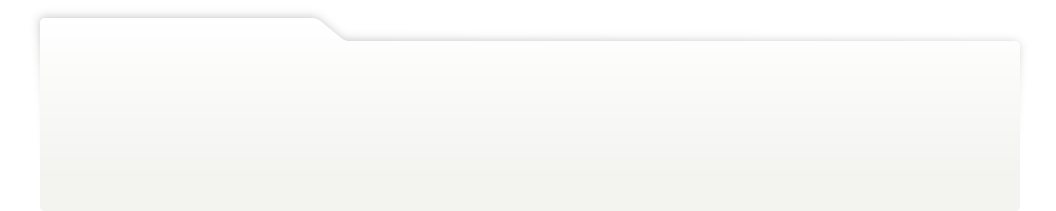
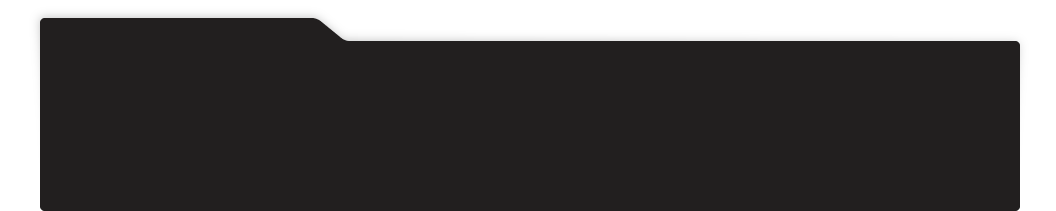
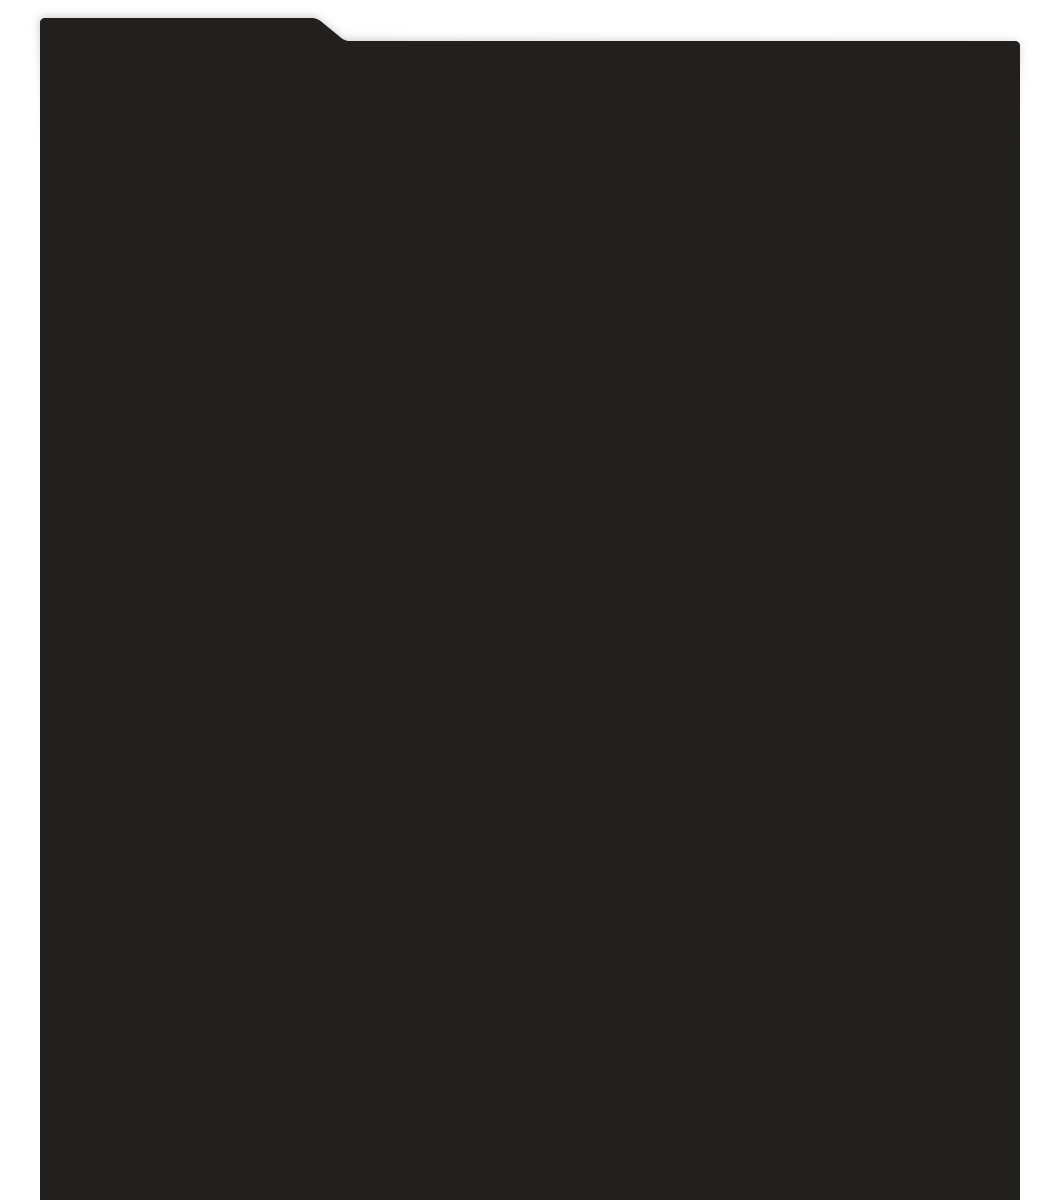
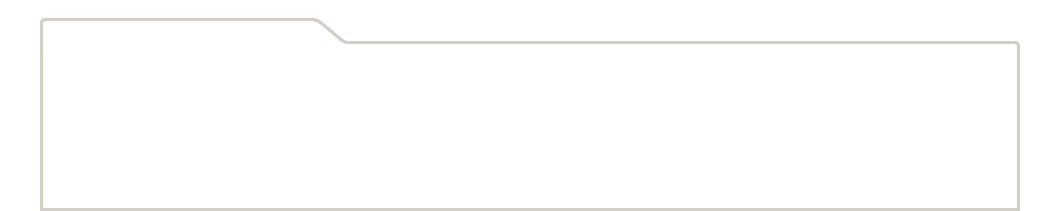
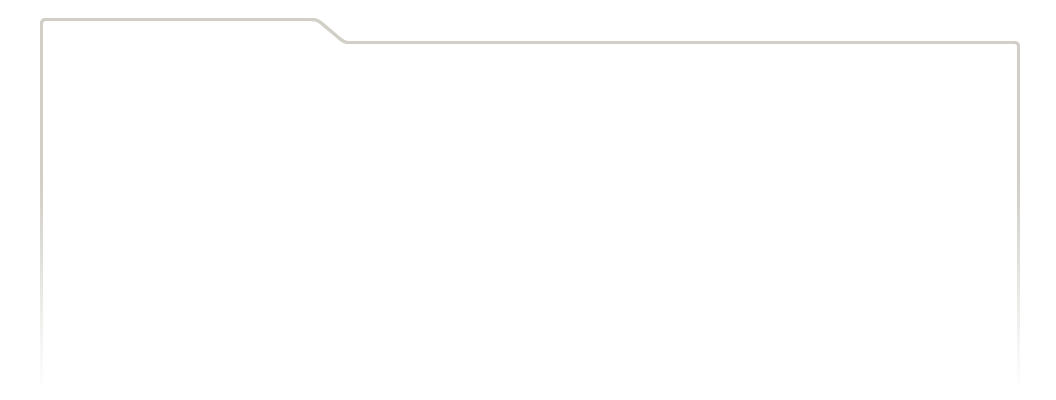
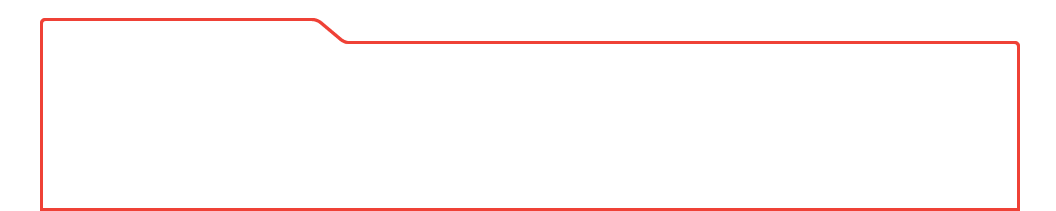
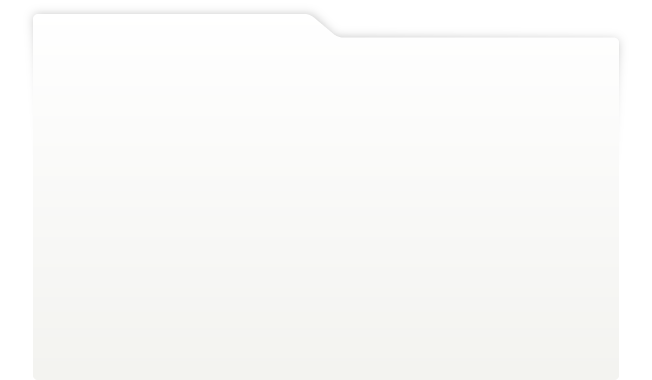
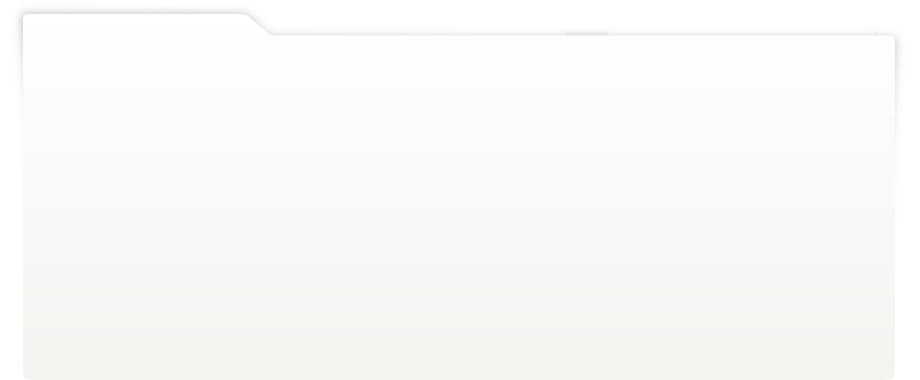
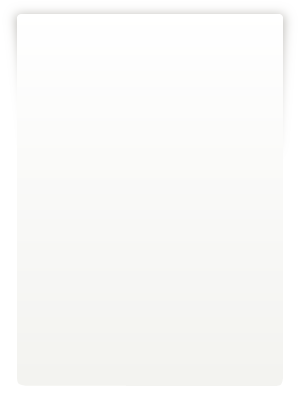
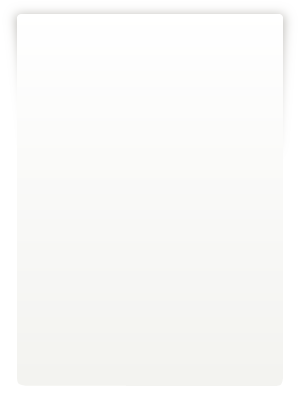
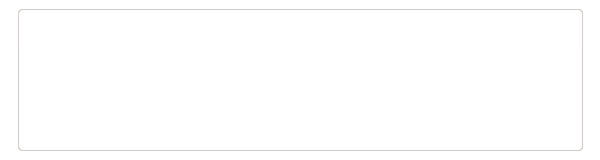
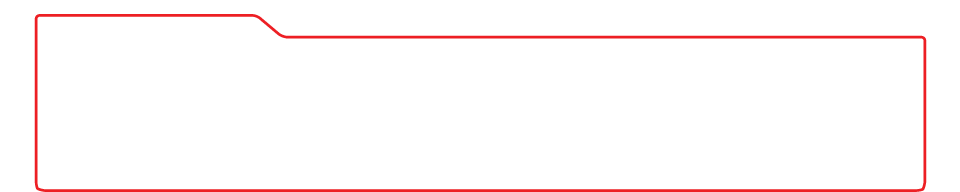
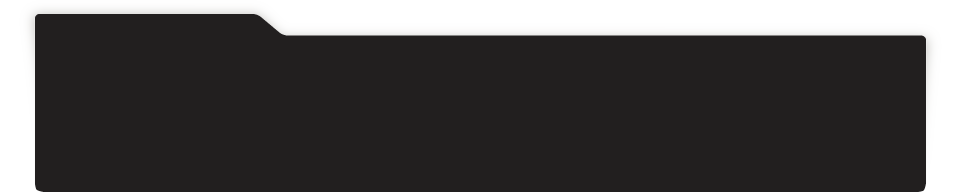
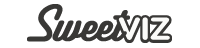
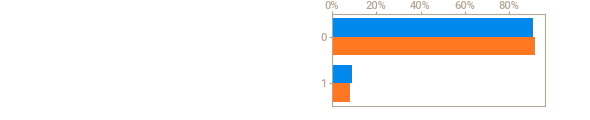
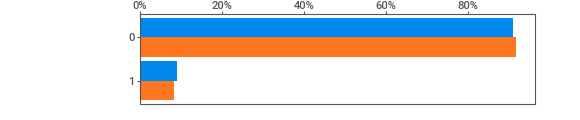
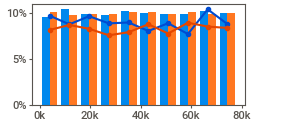
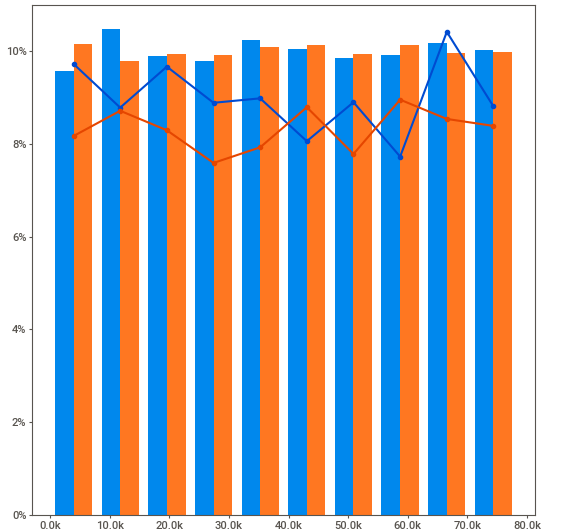
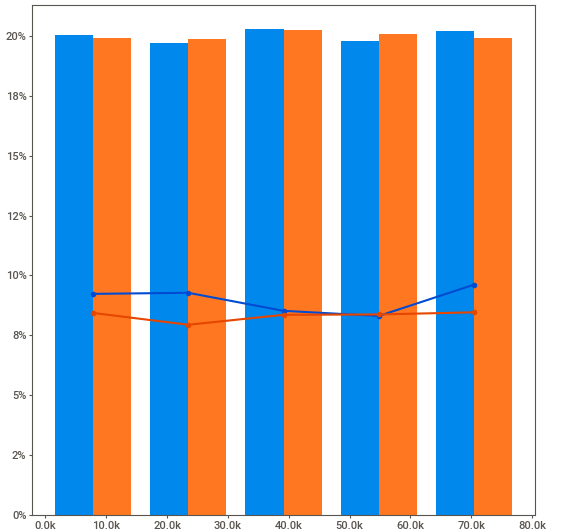
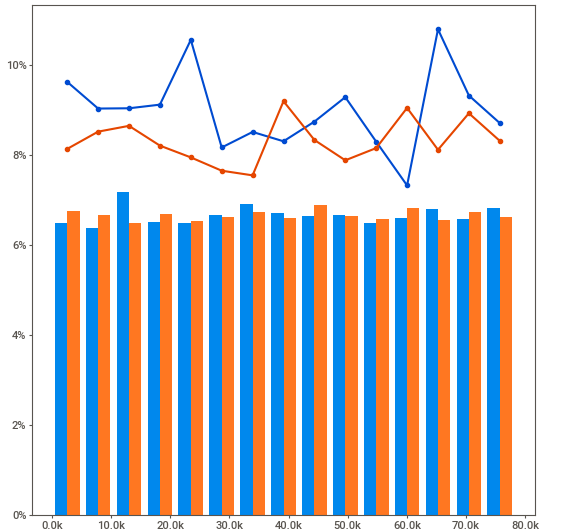
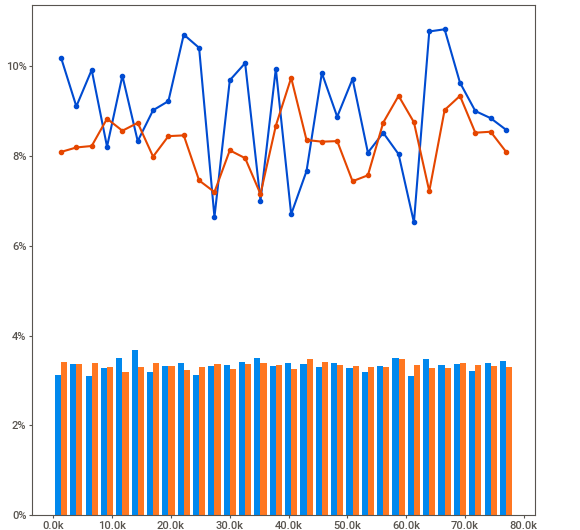
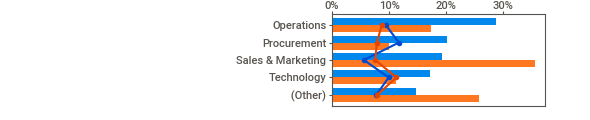
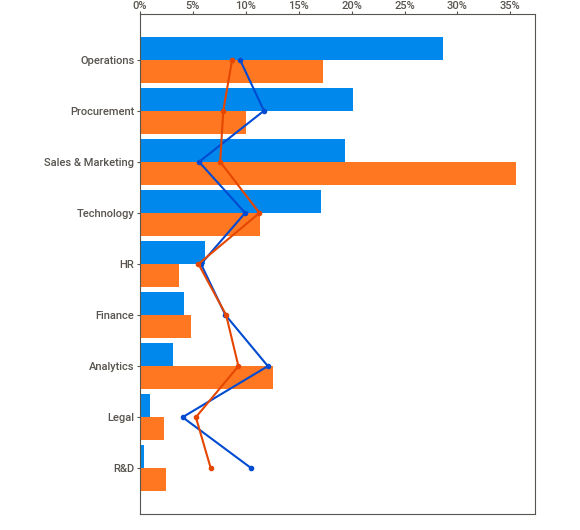
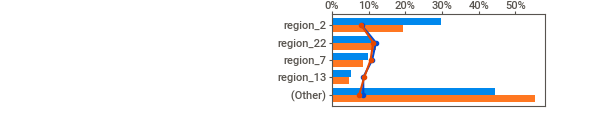
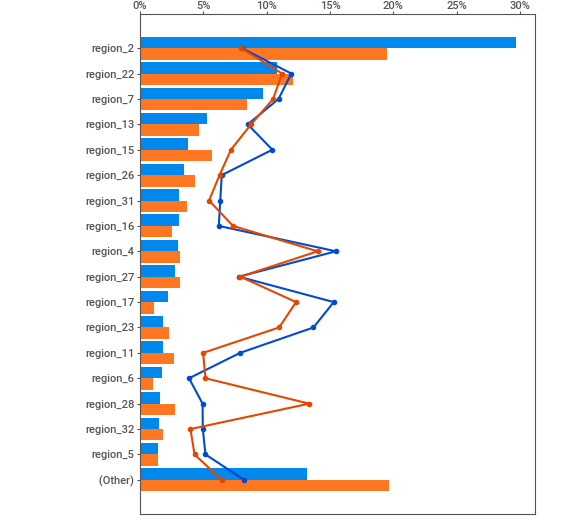
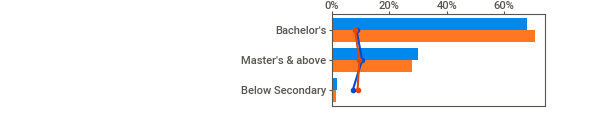
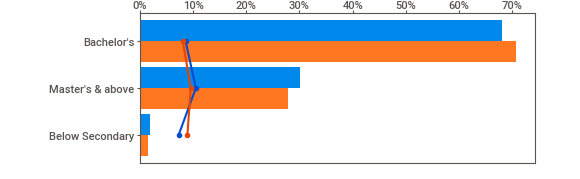
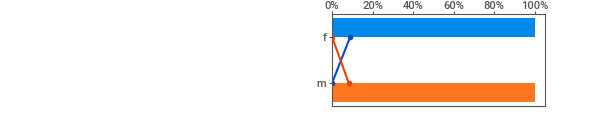
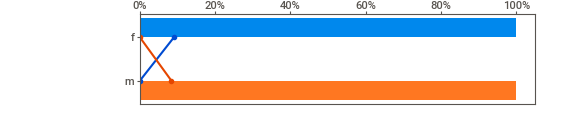
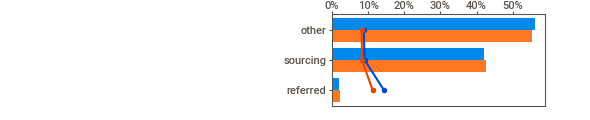
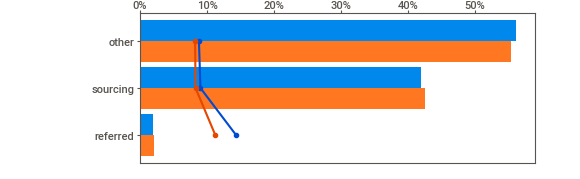
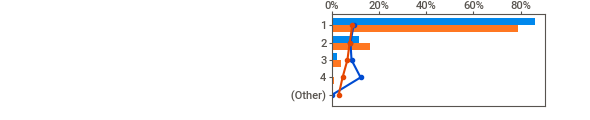
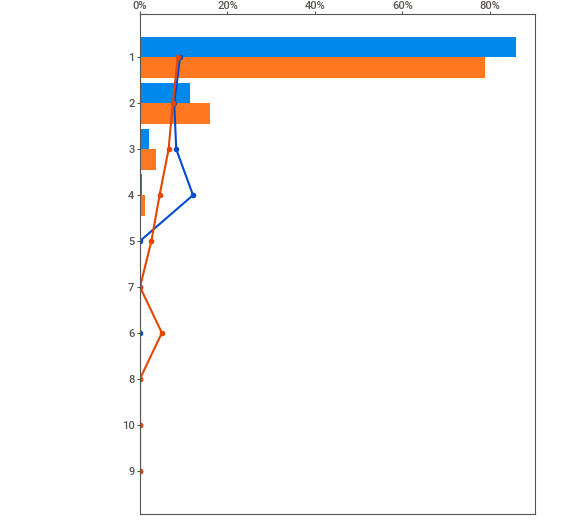
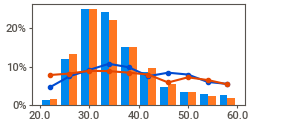
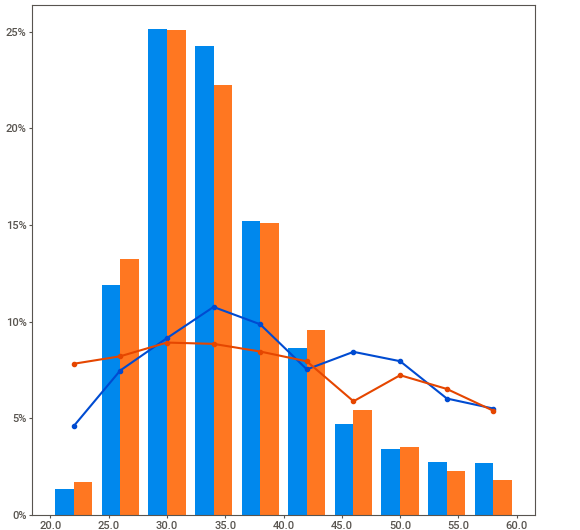
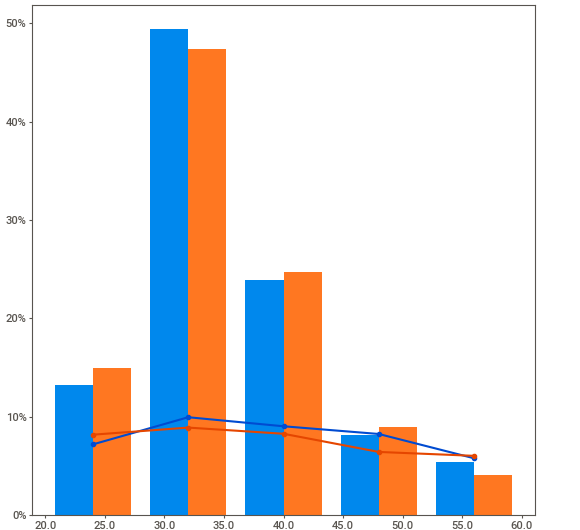
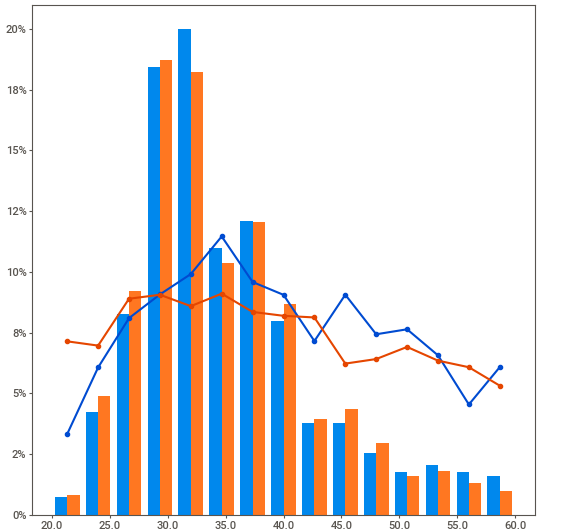
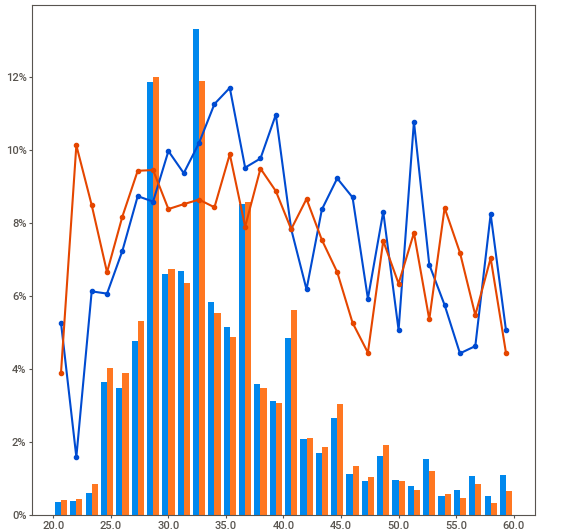
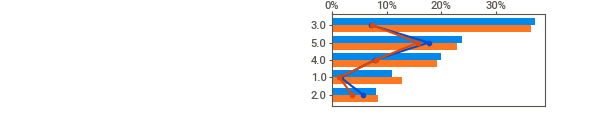
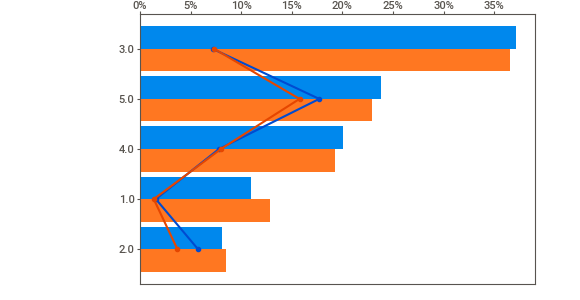
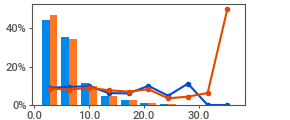
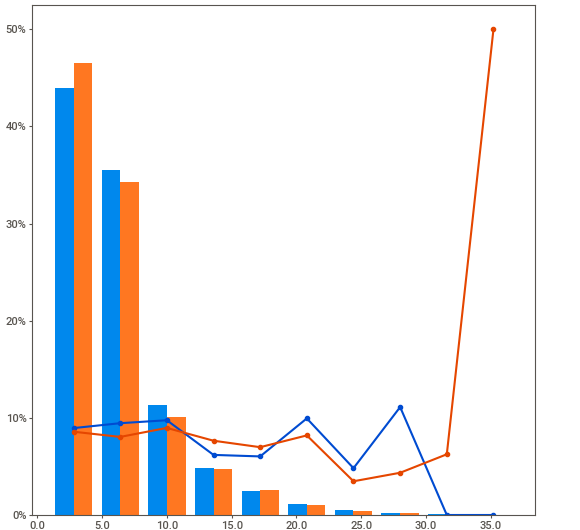
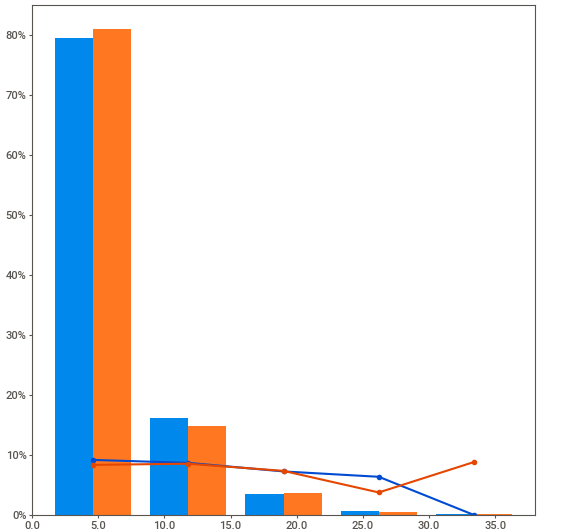
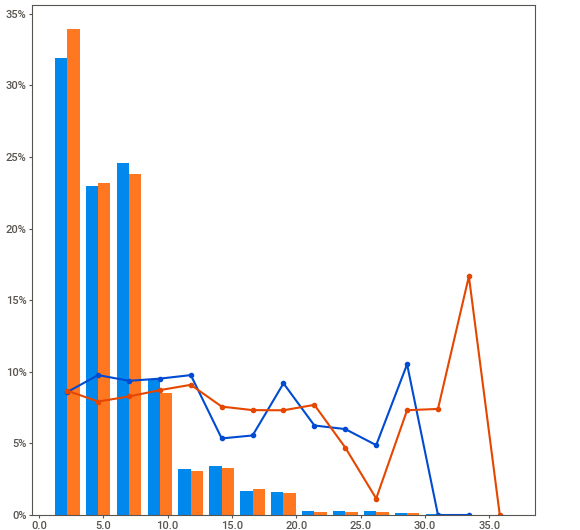
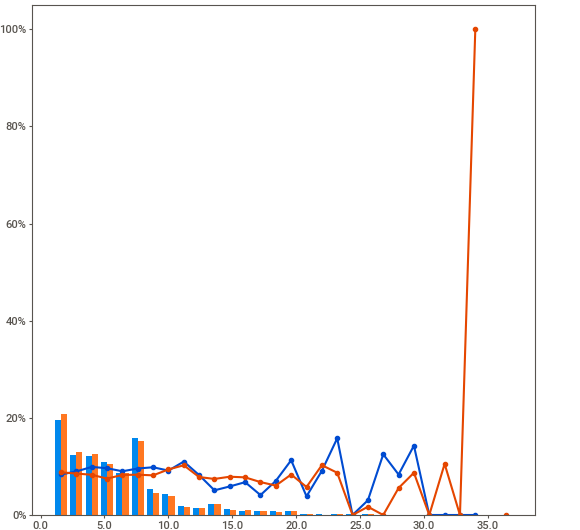
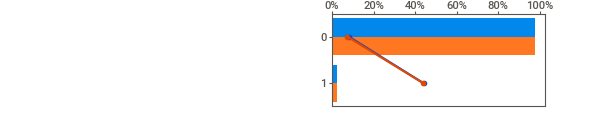
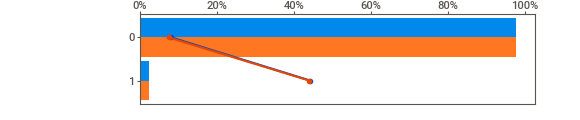
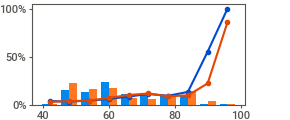
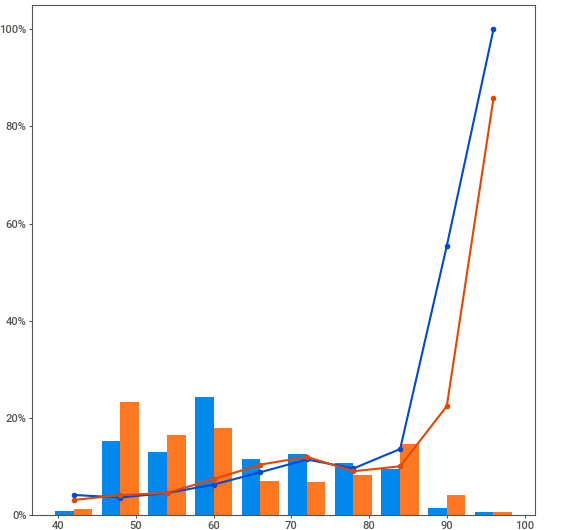
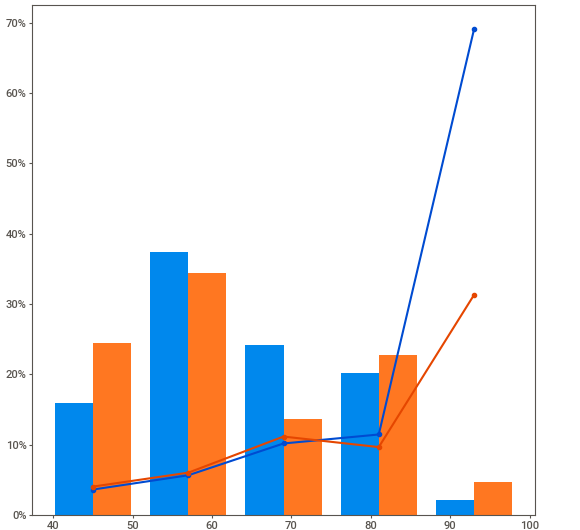
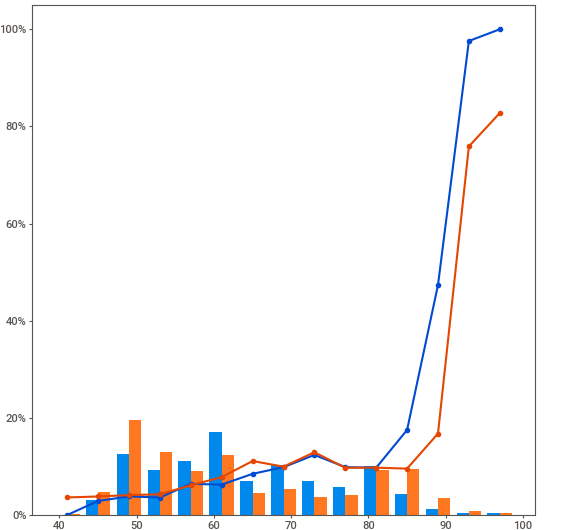
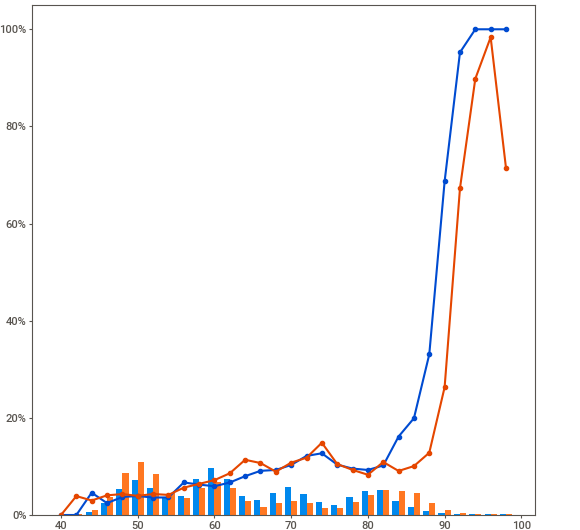
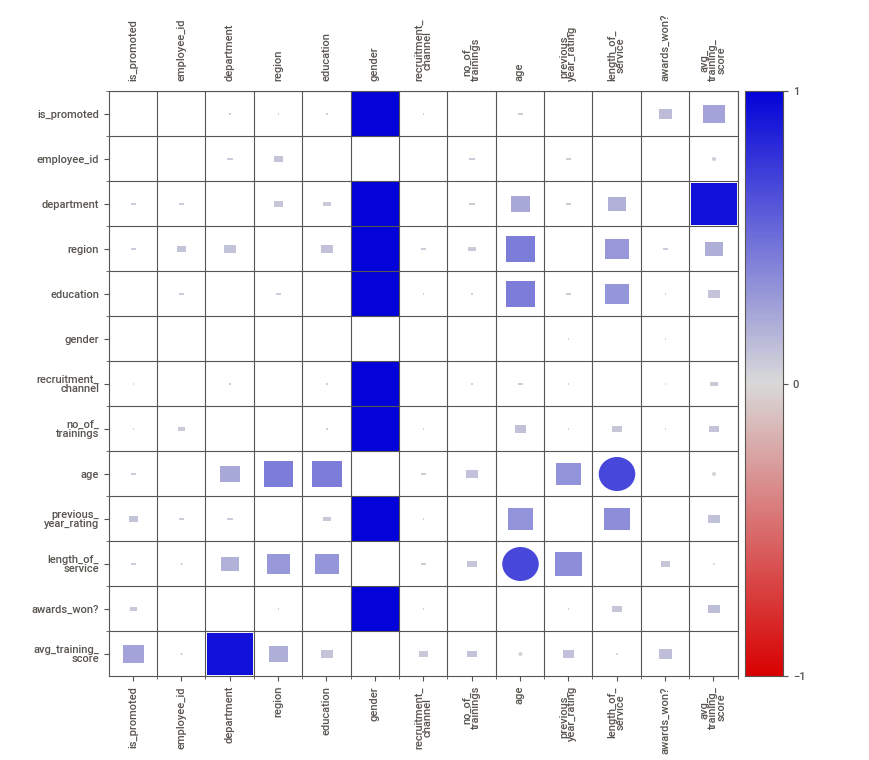
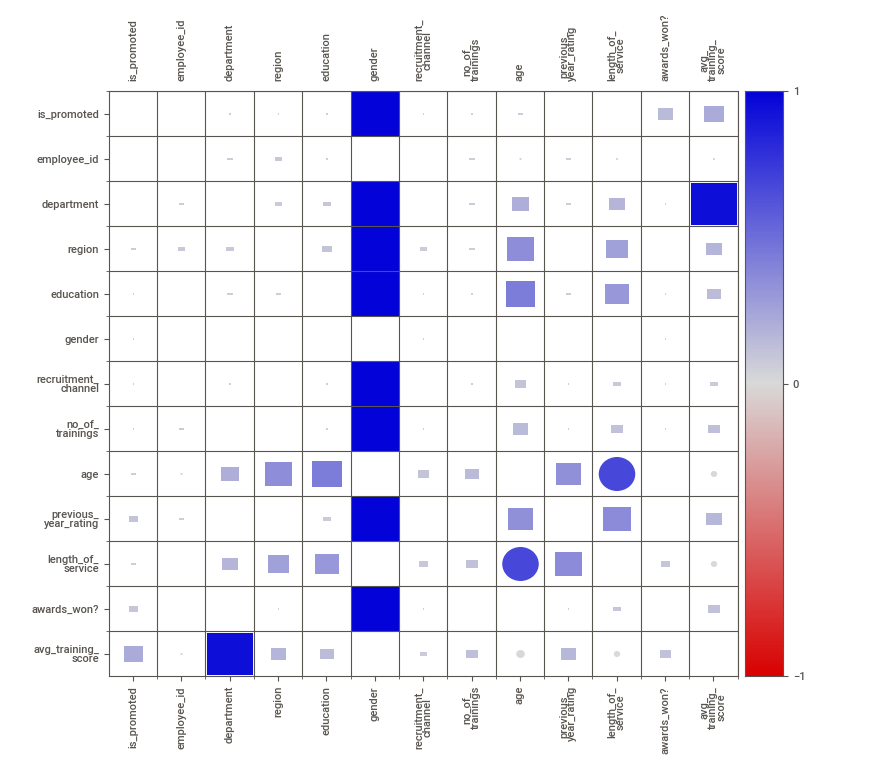

In [164]:
sweetv_compare_intra = sv.compare_intra(info, target_feat='is_promoted', #Establece a la variable objetivo
                                        condition_series=info['gender']=='f', names=['Mujer','Hombre']) #Separa a la base de datos en dos para su comparación
sweetv_compare_intra.show_notebook()

Hay un desbalance en las cantidades de hombres y mujeres, pues más del doble de las personas son hombres. No obstante, proporcionalmente, hay porcentajes muy similares de hombres y mujeres que son promovidas. El 8.988% de las mujeres fueron promovidas y el 8.315% de los hombres fueron promovidos.
En general las gráficas de las distintas variables tienen distribuciones muy similares entre hombres y mujeres, excepto por la de "departamento", en donde parece haber más mujeres que hombres en "Operations" y "Procurement" y muchos más hombres que mujeres en las áreas de "Sales & Marketing" y "Analytics".
Finalmente, viendo a las matrices de correlación lado a lado, no parece haber mucha diferencia entre ser hombre y mujer para las correlaciones en general.



4. Elimina los registros con información faltante (NaN) y la columna employee_id por no tener aportación en la predicción.

In [165]:
info.dropna(axis=0, inplace=True) #Elimina a las filas con valores nulos
info.drop(axis=1, columns=['employee_id'], inplace=True) #Elimina a la columna especificada

In [166]:
info

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0


# Obtención de un modelo de ML con TPOT:

In [167]:
!pip install tpot
from tpot import TPOTClassifier

5. Codifica las variables categóricas de info con LabelEncoder.

In [168]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = info.select_dtypes(include='object').columns.to_list()
info = info.apply(lambda x: LabelEncoder().fit_transform(x) if (x.name in categorical_cols) else x)

6. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro random_state=1 para garantizar reproducibilidad.

In [169]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(info, train_size=0.80, random_state=1)

7. Observa la distribución de la variable objetivo is_promoted. En caso de que las clases estén desbalanceadas, ejecuta over_sampling con el método SMOTE().

In [170]:
info['is_promoted'].value_counts() #Contamos los valores y en efecto se ve un desbalance (que ya se notaba desde el análisis exploratorio)

0    44428
1     4232
Name: is_promoted, dtype: int64

In [171]:
y = 'is_promoted' #Esto es para poder separar a la variable objetivo de las demás luego al hacer el entrenamiento
X = list(info.columns)
X.remove(y)

In [172]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1) #"random_state=1" para preservar la replicabilidad
train[X], train[y] = smote.fit_resample(train[X],train[y]) #Así esa variable queda balanceada, este método necesita a las variables previamente separadas en X,y.

8. Ejecuta el autoaprendizaje utilizando la métrica "accuracy".

In [173]:
tpot = TPOTClassifier(max_time_mins = 1, random_state=1, scoring='accuracy') #Se perzonalizan los ajustes pertinentes
tpot.fit(train[X], train[y]) #Se realiza el entrenamiento
tpot.score(test[X], test[y]) #Se califica al resultado basado en su desempeño en la base test

0.8795725441841348

# Obtención de un modelo de machine learning con PyCaret:

In [174]:
!pip uninstall scikit-learn -y
!pip uninstall pycaret -y

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: pycaret 3.2.0
Uninstalling pycaret-3.2.0:
  Successfully uninstalled pycaret-3.2.0


In [175]:
!pip install scikit-learn
!pip install imbalanced-learn
!pip install pycaret
!pip install jinja2
!pip install pyyaml

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached MarkupSafe-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [176]:
import pycaret
import markupsafe
import jinja2
from pycaret.classification import *

9. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro random_state=1 para garantizar reproducibilidad.

In [177]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(info, train_size=0.80, random_state=1)

10. Ejecuta el autoaprendizaje con parámetros equivalentes a los que usaste en TPOT y optimiza el mejor modelo con la métrica accuracy.

In [178]:
pyc = setup(data=train, target='is_promoted', test_data=test, fix_imbalance=True, session_id=1)

,Description,Value
0,Session id,1
1,Target,is_promoted
2,Target type,Binary
3,Original data shape,"(48660, 12)"
4,Transformed data shape,"(80836, 12)"
5,Transformed train set shape,"(71104, 12)"
6,Transformed test set shape,"(9732, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [179]:
leader = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9403,0.8085,0.3513,0.8993,0.5051,0.4797,0.5406,1.1140
lightgbm,Light Gradient Boosting Machine,0.9392,0.8141,0.3261,0.9232,0.4818,0.4573,0.5283,5.8480
rf,Random Forest Classifier,0.9259,0.7621,0.2530,0.7036,0.3717,0.3415,0.3929,8.0740
et,Extra Trees Classifier,0.9246,0.7627,0.2935,0.6447,0.4029,0.3686,0.4016,6.0860
gbc,Gradient Boosting Classifier,0.9177,0.7707,0.2308,0.5649,0.3274,0.2916,0.3253,10.5290
dummy,Dummy Classifier,0.9133,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1440
ada,Ada Boost Classifier,0.9000,0.7324,0.2160,0.3774,0.2718,0.2225,0.2339,2.8500
dt,Decision Tree Classifier,0.8728,0.6387,0.3552,0.3020,0.3262,0.2565,0.2576,0.3530
nb,Naive Bayes,0.8165,0.7110,0.4366,0.2197,0.2922,0.1999,0.2155,0.1530
qda,Quadratic Discriminant Analysis,0.8058,0.7107,0.4411,0.2080,0.2825,0.1867,0.2045,0.2250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [180]:
leader = create_model(leader)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9427,0.8197,0.3561,0.9524,0.5184,0.4945,0.5631
1,0.9401,0.8181,0.3591,0.8768,0.5095,0.4835,0.5387
2,0.9327,0.7756,0.3107,0.7836,0.4449,0.4161,0.4672
3,0.9417,0.8295,0.3639,0.9111,0.5201,0.4951,0.5548
4,0.9419,0.8180,0.3728,0.9000,0.5272,0.5019,0.5578
5,0.9396,0.8014,0.3462,0.8931,0.4989,0.4734,0.5344
6,0.9422,0.8062,0.3609,0.9313,0.5203,0.4958,0.5597
7,0.9394,0.8006,0.3432,0.8923,0.4957,0.4702,0.5317
8,0.9414,0.8128,0.3591,0.9098,0.5149,0.4899,0.5506


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [181]:
tuned_leader = tune_model(leader, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9355,0.8145,0.3442,0.7945,0.4803,0.4516,0.4970
1,0.9350,0.8189,0.3591,0.7658,0.4889,0.4590,0.4968
2,0.9273,0.7767,0.3166,0.6730,0.4306,0.3971,0.4296
3,0.9355,0.8153,0.3639,0.7736,0.4950,0.4653,0.5033
4,0.9342,0.8039,0.3580,0.7562,0.4859,0.4556,0.4922
5,0.9314,0.7938,0.3432,0.7205,0.4649,0.4332,0.4674
6,0.9358,0.7957,0.3639,0.7785,0.4960,0.4665,0.5052
7,0.9322,0.8011,0.3462,0.7312,0.4699,0.4386,0.4738
8,0.9371,0.8146,0.3709,0.7911,0.5051,0.4761,0.5153


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


11. Utiliza evaluate_model() para mostrar la interfaz de usuario con detalles del modelo optimizado.

In [182]:
evaluate_model(tuned_leader)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

12. Verifica las métricas con el conjunto de prueba.

In [183]:
predict_model(tuned_leader);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9408,0.8131,0.3668,0.9023,0.5216,0.4960,0.5537
